In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
ds = pd.read_csv("/content/drive/MyDrive/datasets/Project 1/Salary.csv")

In [29]:
ds.shape

(35, 2)

In [30]:
ds.head(7)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150


In [31]:
ds.isnull().sum()

,0
YearsExperience,0
Salary,0


In [32]:
ds.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [33]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


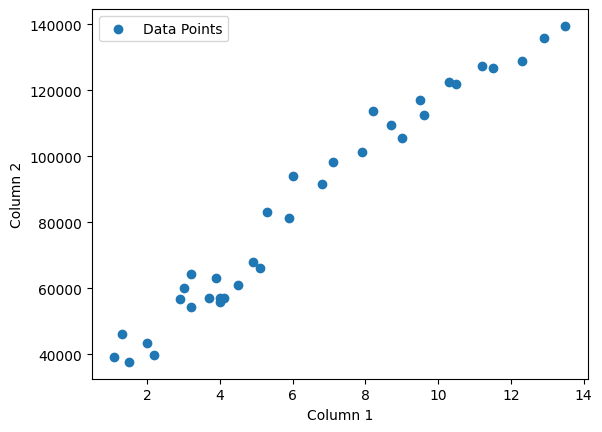

In [34]:
plt.scatter(ds['YearsExperience'], ds['Salary'], label='Data Points')

# Customize the plot
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.legend()

# Show the plot
plt.show()


In [35]:
x = ds.iloc[:, :-1].values
y = ds.iloc[:, -1].values

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=30)

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

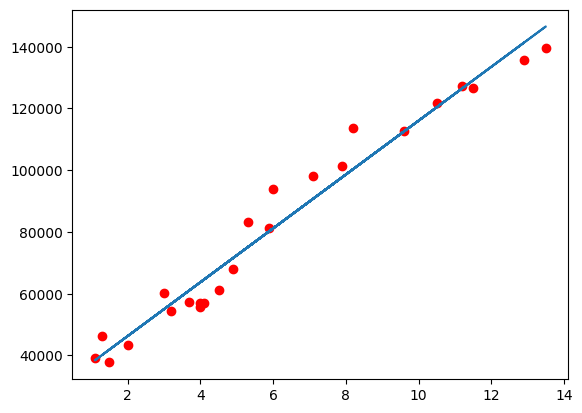

In [38]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, model.predict(x_train))

In [39]:
r_squared = round(model.score(x, y),3)
print(f'R-squared: {r_squared}')

R-squared: 0.965


In [40]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(x_train, y_train)
pred = model.predict

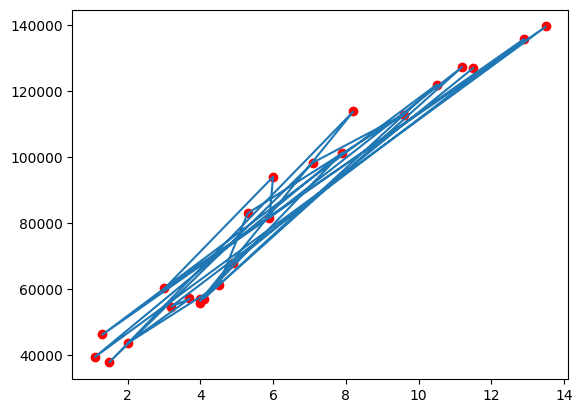

In [41]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, model.predict(x_train))

In [42]:
r_squared = round(model.score(x, y),3)
print(f'R-squared: {r_squared}')

R-squared: 0.99


In [43]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
pred = model.predict

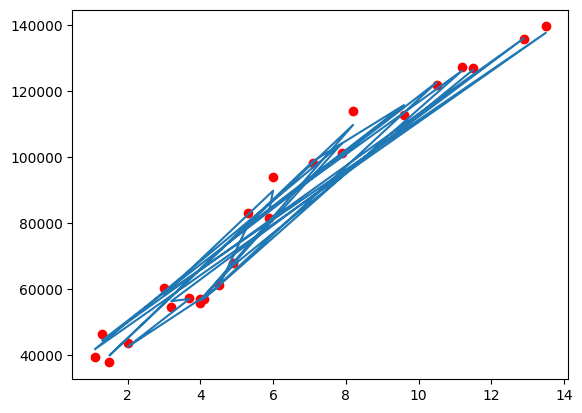

In [44]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, model.predict(x_train))

In [45]:
r_squared = round(model.score(x, y),3)
print(f'R-squared: {r_squared}')

R-squared: 0.99


In [46]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)
pred = model.predict

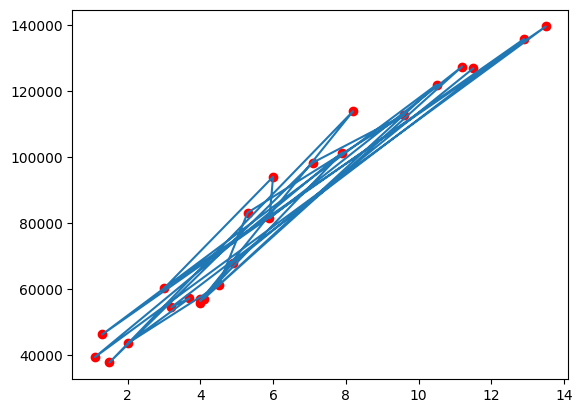

In [47]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, model.predict(x_train))

In [48]:
r_squared = round(model.score(x, y),3)
print(f'R-squared: {r_squared}')

R-squared: 0.99


In [49]:
from sklearn.preprocessing import PolynomialFeatures

model = PolynomialFeatures(degree=2)
x_poly_train = model.fit_transform(x_train)
x_poly_test = model.transform(x_test)

poly_reg = LinearRegression()
poly_reg.fit(x_poly_train, y_train)

pred = poly_reg.predict(x_poly_test)

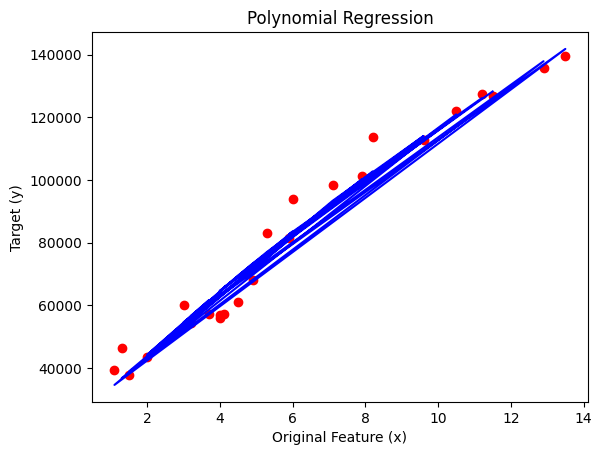

In [51]:
pred_train = poly_reg.predict(x_poly_train)

# Now plot with x_poly_train and pred_train, which should have the same size
plt.scatter(x_poly_train[:, 1], y_train, color='red')  # Use the original feature for scatter plot
plt.plot(x_poly_train[:, 1], pred_train, color='blue') # Use the original feature for line plot

plt.xlabel("Original Feature (x)")
plt.ylabel("Target (y)")
plt.title("Polynomial Regression")
plt.show()

In [53]:
x_poly = model.transform(x)  # Transform 'x' using the same PolynomialFeatures

r_squared = round(poly_reg.score(x_poly, y), 3)
print(f'R-squared: {r_squared}')

R-squared: 0.97


In [72]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.5)  # Adjust alpha as needed
model.fit(x_train, y_train)

pred = model.predict(x_test)

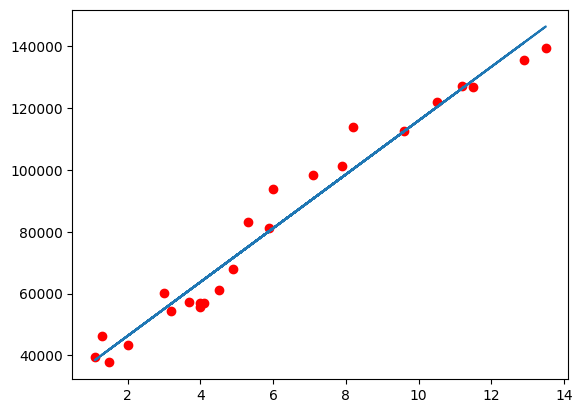

In [73]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, model.predict(x_train))

In [74]:
r_squared = round(model.score(x, y),3)
print(f'R-squared: {r_squared}')

R-squared: 0.965


In [66]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1)  # Adjust alpha as needed
model.fit(x_train, y_train)

# Predictions and evaluation
pred = model.predict(x_test)

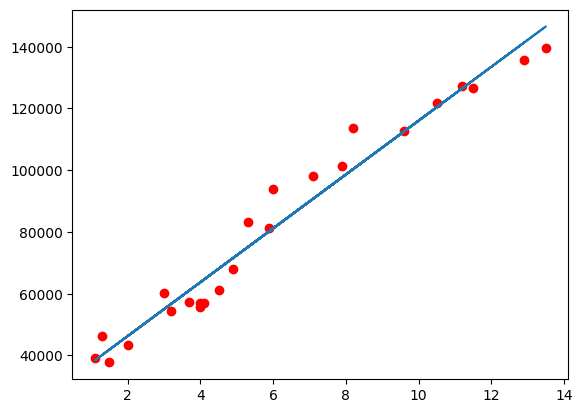

In [67]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, model.predict(x_train))

In [68]:
r_squared = round(model.score(x, y),3)
print(f'R-squared: {r_squared}')

R-squared: 0.965
